In [1]:
from src import esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="C_PAW_Wannier") #Initialize model
model.set_cores(64) #Define number of processing cores
model.get_structure(format="poscar",path="/work/bansil/s.sevim/Test/espresso-machine/Structures/C.poscar")
model.set_pseudo(path="/work/bansil/s.sevim/Test/espresso-machine/Pseudopotentials/PBE/PAW")
model.ecutwfc(80) #Wavefunction cut-off
model.ecutrho(500) #Wavefunction cut-off
model.k_points([12,12,1]) #k mesh 
model.smearing('mv')
model.conv_thr(1e-12) #Set convergence threshold
model.ph_thr(1e-16) #Set convergence threshold
model.etot_conv_thr(10**-7) 
model.forc_conv_thr(10**-6)
model.press_conv_thr(0.01)


In [3]:
model.make_layer(layer_type='mono',direction='z')
model.cell_dof('2Dxy') #Fix cell relaxation to 2D


In [4]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

Starting vc-relax iteration 1 
vc-relax for results is started
vc-relax for results is finished
vc-relax is converged after 1 steps
scf for results is started
scf for results is finished
bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


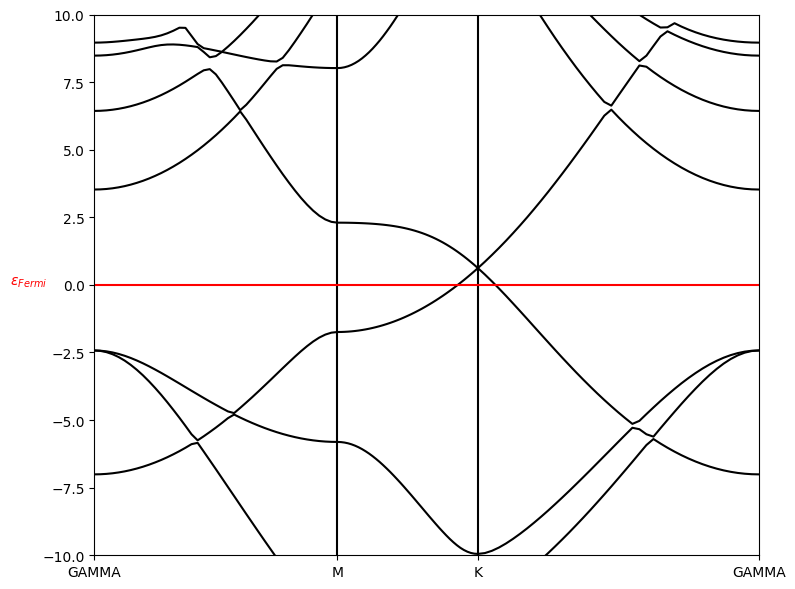

In [5]:

model.optimize(calculation='vc-relax',max_iter=1) #Relax lattice constant
model.calculate('scf')
path = ['GAMMA','M','K','GAMMA'] #choose corners
model.band_points(path,number=40) #define path
model.calculate('bands')
model.plot('electron',ylim=[-10,10]) #plot electron bands

In [6]:
model.calculate('scf')


scf for results is started
scf for results is finished


In [7]:
model.k_points([24,24,5],grid=True) #k mesh 
model.calculate('nscf')

nscf for results is started
nscf for results is finished


In [8]:
model.calculate('wannier90')

wannier90 for results is started
wannier90 for results is finished


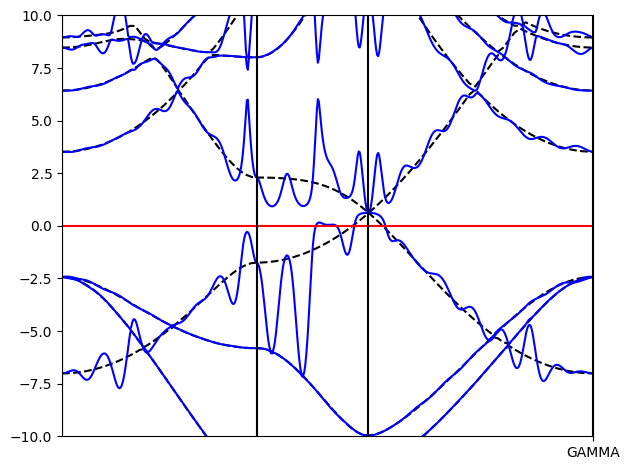

In [9]:
model.plot(calculation='wannier90',ylim=[-10,10])